In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('complete-data.csv')



In [40]:
data.shape

(1212, 13)

In [41]:
data['Landslide'].value_counts()

Landslide
0    606
1    606
Name: count, dtype: int64

In [42]:
data.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


In [44]:

X = data.drop(['Landslide'], axis=1)  
y = data['Landslide']  

In [45]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Check original class distribution
print("Original class distribution:")
print(y.value_counts())

# Use SMOTE to balance the dataset
smote = SMOTE(sampling_strategy={0: 1000, 1: 1000}, random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame (optional)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Landslide'] = y_resampled

# Check new class distribution
print("\nNew class distribution after SMOTE:")
print(y_resampled.value_counts())

# Now you can use df_resampled for training your models


Original class distribution:
Landslide
0    606
1    606
Name: count, dtype: int64

New class distribution after SMOTE:
Landslide
0    1000
1    1000
Name: count, dtype: int64


In [46]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(numeric_cols)
print(categorical_cols)

Index(['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology',
       'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile', 'Slope'],
      dtype='object')
Index([], dtype='object')


In [48]:
selector = SelectKBest(score_func=chi2, k=10)  
X_selected = selector.fit_transform(X_resampled, y_resampled)

# Step 5: Get feature scores and names
feature_scores = selector.scores_
print(feature_scores)

[ 0.44606414 27.42543709 17.29865125 31.93551124 65.44360902 20.18913271
 14.95250042 42.59582401  8.80030206 90.61709493 26.00757337 17.40517082]


In [49]:
# Get indices of selected features
selected_feature_indices = selector.get_support(indices=True)
# Retrieve feature names for the selected features
selected_feature = X.columns[selected_feature_indices]
print(selected_feature)

Index(['Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology', 'NDVI',
       'NDWI', 'Precipitation', 'Profile', 'Slope'],
      dtype='object')


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier



X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

print("Training Decision Tree with GridSearchCV...")
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier(random_state=42)
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=20, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best estimator after tuning
best_dt_model = dt_grid_search.best_estimator_

# Make predictions
y_pred_dt = best_dt_model.predict(X_test)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)

# Store results
dt_results = {
    'Best Parameters': dt_grid_search.best_params_,
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F1 Score': dt_f1,
    'Confusion Matrix': dt_confusion_matrix
}

# Display Decision Tree results
print("Decision Tree Results:")
print(f"Best Parameters: {dt_results['Best Parameters']}")
print(f"Accuracy: {dt_results['Accuracy']}")
print(f"Precision: {dt_results['Precision']}")
print(f"Recall: {dt_results['Recall']}")
print(f"F1 Score: {dt_results['F1 Score']}")
print("-" * 30)

Training Decision Tree with GridSearchCV...
Decision Tree Results:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8025
Precision: 0.8039040154015402
Recall: 0.8025
F1 Score: 0.8025950759920225
------------------------------


In [57]:
print("Training Random Forest with GridSearchCV...")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=20, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best estimator after tuning
best_rf_model = rf_grid_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

# Store results
rf_results = {
    'Best Parameters': rf_grid_search.best_params_,
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1,
    'Confusion Matrix': rf_confusion_matrix
}

# Display Random Forest results
print("Random Forest Results:")
print(f"Best Parameters: {rf_results['Best Parameters']}")
print(f"Accuracy: {rf_results['Accuracy']}")
print(f"Precision: {rf_results['Precision']}")
print(f"Recall: {rf_results['Recall']}")
print(f"F1 Score: {rf_results['F1 Score']}")
print("-" * 30)


Training Random Forest with GridSearchCV...
Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.88
Precision: 0.8805041134255208
Recall: 0.88
F1 Score: 0.8800540486437793
------------------------------


In [58]:
print("Training Logistic Regression with GridSearchCV...")
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=20, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

# Best estimator after tuning
best_lr_model = lr_grid_search.best_estimator_

# Make predictions
y_pred_lr = best_lr_model.predict(X_test)

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)

# Store results
lr_results = {
    'Best Parameters': lr_grid_search.best_params_,
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1 Score': lr_f1,
    'Confusion Matrix': lr_confusion_matrix
}

# Display Logistic Regression results
print("Logistic Regression Results:")
print(f"Best Parameters: {lr_results['Best Parameters']}")
print(f"Accuracy: {lr_results['Accuracy']}")
print(f"Precision: {lr_results['Precision']}")
print(f"Recall: {lr_results['Recall']}")
print(f"F1 Score: {lr_results['F1 Score']}")
print("-" * 30)

Training Logistic Regression with GridSearchCV...
Logistic Regression Results:
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.7875
Precision: 0.7888957645764577
Recall: 0.7875
F1 Score: 0.787602296953442
------------------------------


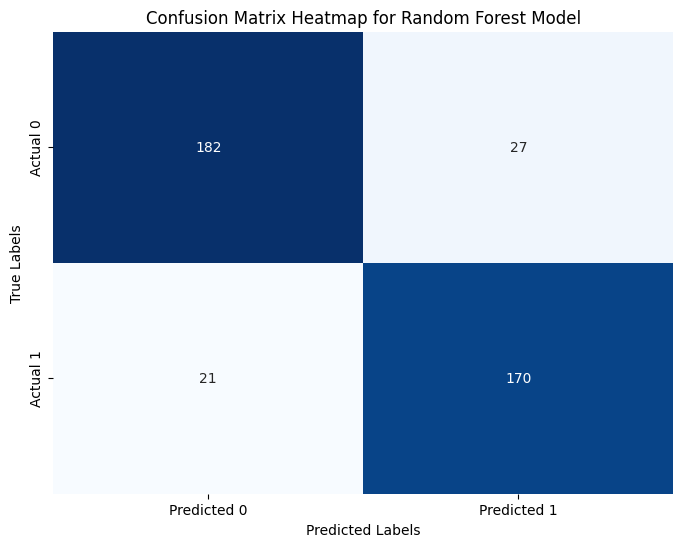

In [59]:
rf_confusion_matrix = rf_results['Confusion Matrix']

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix Heatmap for Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [60]:
import pickle


# Save the model to a file
with open('rf_modelL.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

print("Random Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'
